# Individual assignment 1 - BUSA8000 - Techniques in Business Analytics

- **Student name**: Quoc Phong Nguyen
- **Student ID**: 48203971

**Acknowledgement Statement by students:** I acknowledge that I have **only used** GAITs (e.g., ChatGPT) in drafting and proofreading this assignment, which is permitted in the assignment instructions. 


| Field           | Description                                                                                       |
|-----------------|---------------------------------------------------------------------------------------------------|
| invoice_no      | Invoice number. Nominal. A combination of the letter 'I' and a 6-digit integer uniquely assigned to each operation. |
| customer_id     | Customer number. Nominal. A combination of the letter 'C' and a 6-digit integer uniquely assigned to each operation. |
| gender          | String variable of the customer's gender.                                                         |
| age             | Positive Integer variable of the customer's age.                                                  |
| category        | String variable of the category of the purchased product.                                         |
| quantity        | The quantities of each product (item) per transaction. Numeric.                                   |
| price           | Unit price. Numeric. Product price per unit in Turkish Liras (TL).                                |
| payment_method  | String variable of the payment method (cash, credit card or debit card) used for the transaction. |
| invoice_date    | Invoice date. The day when a transaction was generated.                                           |
| shopping_mall   | String variable of the name of the shopping mall where the transaction was made.                  |

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from scipy.stats import skew


## Section 1: Data Cleansing

In [2]:
# Load the data
shopping = pd.read_csv('customer_shopping_data.csv')

In [3]:
# Display the first 3 rows of the data
shopping.head(3)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,8/05/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,11/09/2021,Metrocity


In [4]:
# Display the shape of the data
shopping.shape

(99461, 10)

In [5]:
# Display the unique values of the data
shopping.nunique()

invoice_no        99458
customer_id       99457
gender                3
age                  53
category             15
quantity              5
price                41
payment_method        6
invoice_date        812
shopping_mall        11
dtype: int64

In [6]:
# Display the overall information of the data
shopping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99461 entries, 0 to 99460
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99461 non-null  object 
 1   customer_id     99461 non-null  object 
 2   gender          99461 non-null  object 
 3   age             99461 non-null  int64  
 4   category        99461 non-null  object 
 5   quantity        99461 non-null  int64  
 6   price           99459 non-null  float64
 7   payment_method  99460 non-null  object 
 8   invoice_date    99461 non-null  object 
 9   shopping_mall   99461 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [7]:
# Display the summary statistics of the data
shopping.describe()

,age,quantity,price
count,99461.000000,99461.000000,99459.000000
mean,43.427796,3.003398,689.253423
std,14.990849,1.413029,941.195107
min,18.000000,1.000000,0.990000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,99.000000,5.000000,5250.000000


### Handling missing values

In [8]:
# Display the missing values of the data
shopping.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             2
payment_method    1
invoice_date      0
shopping_mall     0
dtype: int64

**Comment:** We can observe that the columns of `price` and `payment_method` have 2 and 1 missing values, respectively.

In [9]:
# Show the rows with missing values in `price`
shopping[shopping['price'].isna()]

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
64,I218590,C224743,Female,29,Cosmetics,4,NaN,Debit Card,5/09/2022,Metropol AVM
419,I177957,C653357,Male,65,Clothing,4,NaN,Cash,7/04/2021,Cevahir AVM


In [10]:
# Show the rows with missing values in `payment_method`
shopping[shopping['payment_method'].isna()]

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
298,I215906,C296862,Male,21,Clothing,4,1200.32,NaN,8/13/2021,Mall of Istanbul


**Comment:** As there are only 3 rows with missing values in `price` and `payment_method`, so we can safely remove them

In [11]:
# Remove rows with missing values in `price` and `payment_method`
shopping.dropna(subset=['price', 'payment_method'], inplace = True)

In [12]:
# Check again for missing values
shopping.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

### Data type conversion

In [13]:
# Calculate the length of each entry in the 'invoice_date' column
lengths = shopping['invoice_date'].str.len().unique()
print (lengths)

[ 9 10  5]


In [14]:
# Display the rows with 'invoice_date' length less than 6
shopping[shopping['invoice_date'].str.len()<6]

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
13,I179802,C312861,Male,25,Clothi,2,600.16,Cash,44882,Cevahir AVM
30,I161949,C159164,Female,66,Toy,3,107.52,Debit Card,44746,Mall of Istanbul
49,I304265,C653385,Female,22,Boks,5,75.75,Debit Card,44360,Forum Istanbul
112,I299820,C820515,Female,22,Boks,3,45.45,Cash,44522,Kanyon
236,I218385,C290280,Female,51,Toys,1,35.84,Cash,44761,Metrocity
249,I120948,C340089,Female,54,Shoe,4,2400.68,Debit Card,44416,Mall of Istanbul
353,I508712,C216619,Female,64,Toys,3,107.52,Credit Card,44761,Mall Istanbul
53518,I226929,C185726,Female,43,Cosmetic,3,121.98,Cash,44576,Cevahir AVM
53519,I303174,C305002,Female,20,Tech,1,1050.00,Cash,44222,Istinye Park
53539,I291878,C119087,Mal,49,Toys,3,107.52,Cash,44534,Emaar Square Mall


In [15]:
# We will convert the 'invoice_date' values with length less than 6 to normal date format

def convert_date(date_str):
    if len(date_str) == 5:
        # Convert serial date to datetime
        date = pd.to_datetime('1899-12-30') + pd.to_timedelta((int(date_str)),unit='D')
        # Format the date as MM/DD/YYYY
        return date.strftime('%m/%d/%Y')
    else:
        return date_str

shopping['invoice_date'] = shopping['invoice_date'].apply(convert_date)

In [16]:
# Convert the 'invoice_date' column to datetime
shopping['invoice_date'] = pd.to_datetime(shopping['invoice_date'], format = 'mixed', errors = 'coerce')

In [17]:
# Extract the month and year from the 'invoice_date' column
shopping['month'] = shopping['invoice_date'].dt.month
shopping['year'] = shopping['invoice_date'].dt.year
shopping['month_year'] = shopping['invoice_date'].dt.to_period('M').astype(str)

### Handling format and wrong entries

#### `gender`

In [18]:
# Check the values of `gender`
shopping['gender'].value_counts()

gender
Female    59484
Male      39973
Mal           1
Name: count, dtype: int64

In [19]:
# Fix the entry of 'Mal'
gender_correction = {'Mal':'Male'}
shopping['gender'] = shopping['gender'].replace(gender_correction)

In [20]:
shopping['gender'].value_counts()

gender
Female    59484
Male      39974
Name: count, dtype: int64

#### `category`

In [21]:
# Check the values of `category`
shopping['category'].value_counts()

category
Clothing           34484
Cosmetics          15095
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4995
Books               4980
Boks                   2
Clothi                 1
Toy                    1
Shoe                   1
Cosmetic               1
Tech                   1
Food                   1
Name: count, dtype: int64

**Comment:** The results above indicate the the column of `category` has several misspelled name

In [22]:
# Fix the entries of 'Clothi', 'Boks', 'Toy', 'Shoe', 'Cosmetic', 'Tech', 'Food'
category_correction = {'Clothi':'Clothing', 'Boks':'Books', 'Toy':'Toys','Shoe':'Shoes','Cosmetic':'Cosmetics', 'Tech':'Technology','Food':'Food & Beverage'}
shopping['category'] = shopping['category'].replace(category_correction)

#### `payment_method`

In [23]:
# Check the values of `payment_method`
shopping['payment_method'].value_counts()

payment_method
Cash           44447
Credit Card    34929
Debit Card     20078
CreditCard         2
##error##          1
Cash Cash          1
Name: count, dtype: int64

**Comment:** We will correct the mispelled names of the payment method, and `##error##` will be replaced by `Cash` as it is the most common payment method.

In [24]:
# Fix the entries of `payment_method`
payment_correction = {'CreditCard':'Credit Card', '##error##':'Cash', 'Cash Cash':'Cash'}
shopping['payment_method'] = shopping['payment_method'].replace(payment_correction)

#### `shopping_mall`

In [25]:
# Check the values of `shopping_mall`
shopping['shopping_mall'].value_counts()

shopping_mall
Mall of Istanbul     19943
Kanyon               19823
Metrocity            15013
Metropol AVM         10160
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4990
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Mall Istanbul            1
Name: count, dtype: int64

**Comment:** The results indicate that shopping malls have one mismatched entry: Mall Istanbul

In [26]:
# Fix the entries of `shopping_mall`
mall_correction = {'Mall Istanbul': 'Mall of Istanbul'}
shopping['shopping_mall'] = shopping['shopping_mall'].replace(mall_correction)

#### `invoice_no`

In [27]:
#  Check if invoice_no starts with 'I' and is followed by 6 digits
def check_invoice_no(invoice_no):
    pattern = r'^I\d{6}$'
    if re.match(pattern, invoice_no):
        return True
    else:
        return False

# Apply the function to the 'invoice_no' column
invalid_invoice = shopping[~shopping['invoice_no'].apply(check_invoice_no)]

print(invalid_invoice)

Empty DataFrame
Columns: [invoice_no, customer_id, gender, age, category, quantity, price, payment_method, invoice_date, shopping_mall, month, year, month_year]
Index: []


**Comment:** The results suggest that the column of invoice_no has a pattern of 'I' and 6 digits

#### `customer_id`

In [28]:
#  Check if customer_id starts with 'C' and is followed by 6 digits
def check_customer_id(customer_id):
    pattern = r'^C\d{6}$'
    if re.match(pattern, customer_id):
        return True
    else:
        return False

# Apply the function to the 'customer_id' column
invalid_customer_id = shopping[~shopping['customer_id'].apply(check_customer_id)]

invalid_customer_id

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,month,year,month_year
99418,I166977,C2061##,Female,34,Cosmetics,5,203.3,Credit Card,2022-02-05,Kanyon,2,2022,2022-02


**Comment:** We decide to keep the record with the invalid `customer_id` "C2061##" because other relevant information such as gender, age, category, quantity, price, and payment method is still available and valuable for analysis.

### Duplicate records

In [29]:
# Check the duplicate records by `invoice_no`` and `customer_id`
duplicates = shopping[shopping.duplicated(subset=['invoice_no', 'customer_id'], keep=False)]
duplicates

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,month,year,month_year
236,I218385,C290280,Female,51,Toys,1,35.84,Cash,2022-07-19,Metrocity,7,2022,2022-07
237,I218385,C290280,Female,51,Toys,1,35.84,Cash,2022-07-19,Metrocity,7,2022,2022-07
249,I120948,C340089,Female,54,Shoes,4,2400.68,Debit Card,2021-08-08,Mall of Istanbul,8,2021,2021-08
250,I120948,C340089,Female,54,Shoes,4,2400.68,Debit Card,2021-08-08,Mall of Istanbul,8,2021,2021-08
99389,I170876,C320288,Male,40,Food & Beverage,3,15.69,Cash,2022-08-14,Metrocity,8,2022,2022-08
99390,I170876,C320288,Male,40,Food & Beverage,3,15.69,Cash,2022-08-14,Metrocity,8,2022,2022-08


**Comment:** For each pair of `invoice_no` and `customer_id`, we can observe the duplicate in the recorded transactions, so we are going to keep the first record of each and remove the corresponding duplicates.

In [30]:
# Drop the duplicate records
shopping.drop_duplicates(subset=['invoice_no', 'customer_id'], keep='first', inplace=True)

In [31]:
# Check the duplicate records by 'invoice_no' only
duplicates_invoice = shopping[shopping.duplicated(subset=['invoice_no'], keep=False)]
duplicates_invoice

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,month,year,month_year


**Comment:** There is no duplicate if we check the data by `invoice_id` only

In [32]:
# Check the duplicate records by 'customer_id' only
duplicates_customer_id = shopping[shopping.duplicated(subset=['customer_id'], keep=False)]
duplicates_customer_id

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,month,year,month_year
53605,I565442,C223892,Female,51,Books,2,30.30,Debit Card,2023-01-12,Emaar Square Mall,1,2023,2023-01
53606,I565111,C223892,Female,99,Books,1,0.99,Cash,2023-01-12,Mall of Istanbul,1,2023,2023-01


**Comment:** We can observe that, if using `customer_id` as the criteria, there are duplicated records in the dataset. The customer with id = `C223892` is recorded by different personal information of age but with the same other information like gender, category, date of purchase. Thus, we decide to remove the second record as it looks like a wrong entry as well as an outlier because the age is too old compared to the distribution of `age`.

In [33]:
# Drop the duplicate records found by 'customer_id' only
shopping.drop_duplicates(subset=['customer_id'], keep='first', inplace=True)

### Histograms to check the data distribution

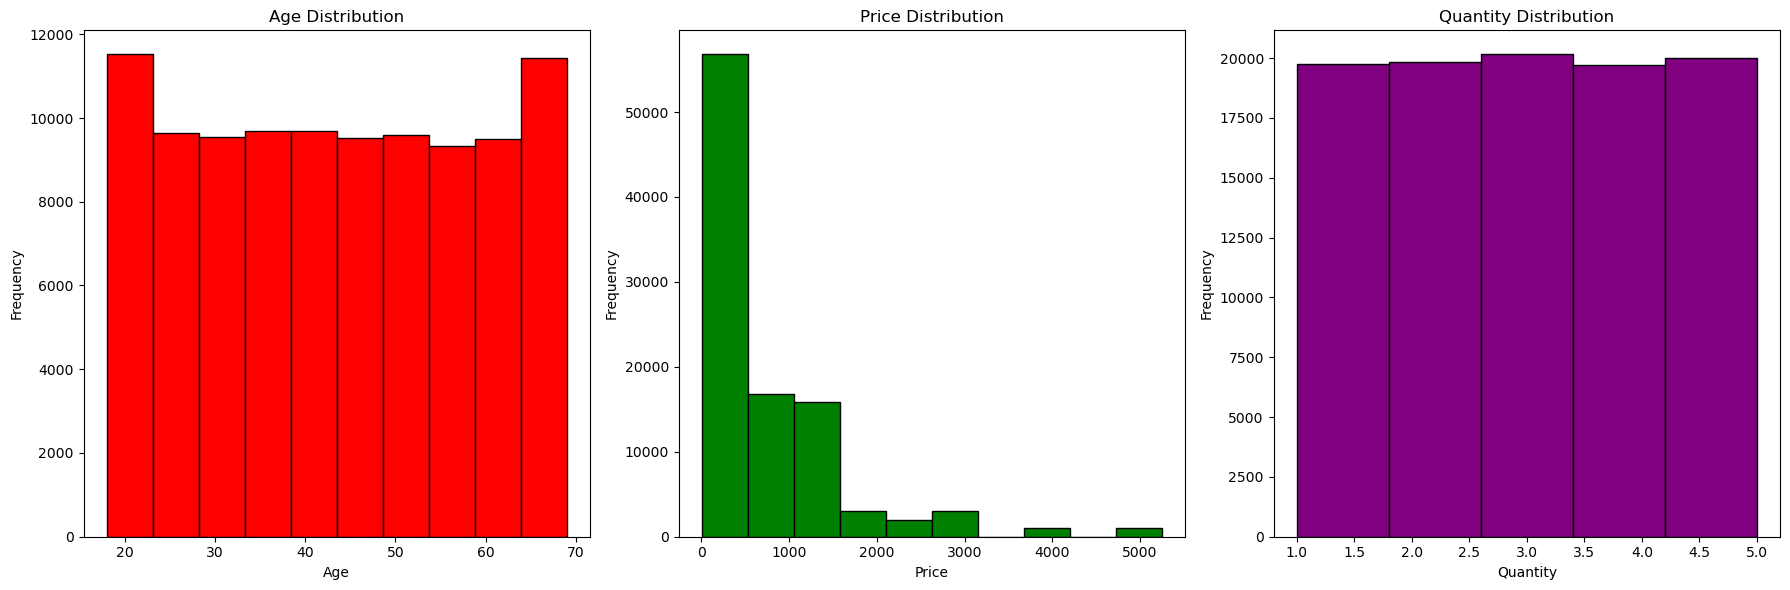

In [34]:
# Create histograms for the numerical columns
plt.figure(figsize=(18, 6))

# Plot for `age`
plt.subplot(1,3,1)
plt.hist(shopping['age'], bins=10, color='red', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Plot for `price`
plt.subplot(1,3,2)
plt.hist(shopping['price'], bins=10, color='green', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Plot for `quantity`
plt.subplot(1,3,3)
plt.hist(shopping['quantity'], bins=5, color='purple', edgecolor='black')
plt.title('Quantity Distribution')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [35]:
# Calculate the skewness of the numerical columns
numerical_columns = ['age', 'quantity', 'price']

for col in numerical_columns:
    skewness = skew(shopping[col])
    print(f'Skewness of {col}: {skewness}')

Skewness of age: 0.00900338120208084
Skewness of quantity: -0.0012423991589802362
Skewness of price: 2.24741052225526


**Skewness of `age`: 0.0090**
- The skewness value is close to zero, indicating that the age distribution is approximately symmetric.
- The histogram of supports this, showing a roughly uniform distribution with a slight concentration of more values in the middle age groups.

**Skewness of `price`: 2.2474**
- A positive skewness greater than 1 indicates a highly right-skewed distribution. This means most of the items are at the lower price range, and as the price increases, there are fewer items. This results in a "tail" where there are only a few high-priced items compared to the many low-priced ones.
- The histogram clearly shows this, with a large concentration of data at the lower end and a sharp drop-off toward higher prices.

**Skewness of `quantity`: -0.0012**
- The skewness is close to zero, suggesting an approximately symmetrical distribution.
- The histogram confirms this by showing an almost perfectly uniform distribution across the quantity values, indicating that each quantity category is equally represented.


### Outliers

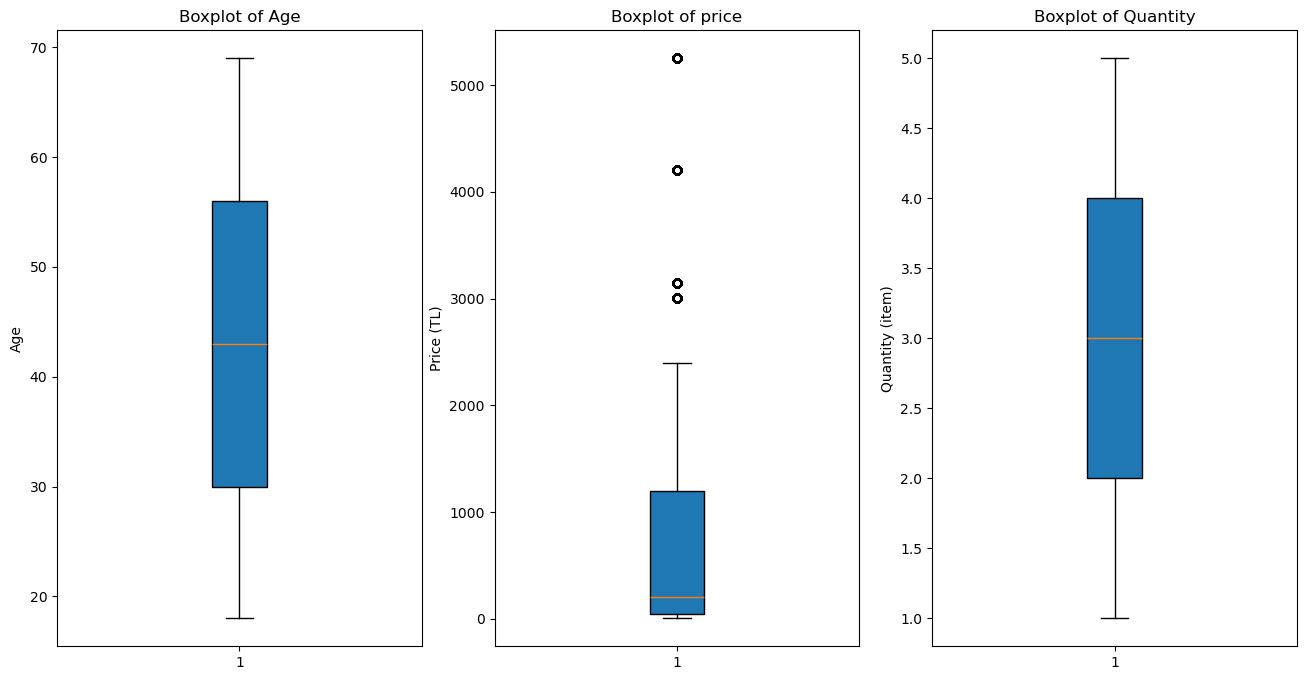

,age,price,quantity
count,99454.000000,99454.000000,99454.000000
mean,43.427243,689.251339,3.003399
std,14.989885,941.194491,1.413036
min,18.000000,5.230000,1.000000
25%,30.000000,45.450000,2.000000
50%,43.000000,203.300000,3.000000
75%,56.000000,1200.320000,4.000000
max,69.000000,5250.000000,5.000000


In [36]:
# Create boxplots to identify outliers
plt.figure(figsize=(16, 8))

# Age boxplot
plt.subplot(1, 3, 1)
plt.boxplot(shopping['age'], patch_artist=True)
plt.title('Boxplot of Age')
plt.ylabel('Age')

# Price boxplot
plt.subplot(1, 3, 2)
plt.boxplot(shopping['price'], patch_artist=True)
plt.title('Boxplot of price')
plt.ylabel('Price (TL)')

# Quantity boxplot
plt.subplot(1, 3, 3)
plt.boxplot(shopping['quantity'], patch_artist=True)
plt.title('Boxplot of Quantity')
plt.ylabel('Quantity (item)')


#plt.tight_layout()
plt.show()

shopping[['age', 'price', 'quantity']].describe()

**Age**
- The boxplot for age shows a fairly symmetrical distribution.
- Most ages are clustered between around 30 and 56, with a median around 43.
- There are no significant outliers, and the data reflects a consistent age range.


**Price**
- The price boxplot also indicates a right-skewed distribution.
- The median price is much lower than the upper quartile, which means that most prices are on the lower end.
- Several outliers are present, representing higher-priced items.
- These outliers occur in categories like shoes and technology, which are typically higher-value products. 
- Retaining these outliers is important as they represent genuine high-value items and removing them could lead to a loss of valuable information about the market's pricing spectrum.

**Quantity**
- The quantity distribution appears more uniform, with a wide spread from 1 to 5.
- There are no significant outliers, indicating consistent transaction quantity across data.
- The majority of data points range between 2 and 4 with the typical purchase quantity at a median value of 3.

In [37]:
# For 'Price' column
## Calculate 25th and 75th percentiles
Q1 = shopping['price'].quantile(0.25)
Q3 = shopping['price'].quantile(0.75)

print ('25th Percentile of Price:', Q1)
print ('75th Percentile of Price:', Q3)

## Calculate IQR of 'Price'
IQR = Q3 - Q1
print ('IQR of Price:', IQR)

## Calculate the lower and upper bounds of 'Price'
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

print ('Lower Bound of Price:', lower_bound)
print ('Upper Bound of Price:', upper_bound)

25th Percentile of Price: 45.45
75th Percentile of Price: 1200.32
IQR of Price: 1154.87
Lower Bound of Price: -1686.8549999999998
Upper Bound of Price: 2932.625


In [38]:
## Isolate the outliers on the lower end of the 'Price' column
outliers_low = shopping[shopping['price'] < lower_bound]
print ('Outliers on the Lower End of Price:')
print (outliers_low)

Outliers on the Lower End of Price:
Empty DataFrame
Columns: [invoice_no, customer_id, gender, age, category, quantity, price, payment_method, invoice_date, shopping_mall, month, year, month_year]
Index: []


In [39]:
## Isolate the outliers on the upper end of the 'Price' column
outliers_high = shopping[shopping['price'] > upper_bound]
print ('Outliers on the Upper End of Price:')
outliers_high

Outliers on the Upper End of Price:


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,month,year,month_year
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,5,2021,2021-05
15,I688768,C362288,Male,24,Shoes,5,3000.85,Credit Card,2021-11-07,Viaport Outlet,11,2021,2021-11
23,I252275,C313348,Male,44,Technology,5,5250.00,Cash,2021-10-26,Kanyon,10,2021,2021-10
53,I160777,C626042,Female,43,Technology,4,4200.00,Cash,2022-02-22,Metrocity,2,2022,2022-02
69,I883721,C236859,Female,44,Technology,5,5250.00,Credit Card,2021-11-19,Mall of Istanbul,11,2021,2021-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99335,I206967,C232954,Female,53,Shoes,5,3000.85,Credit Card,2022-03-13,Metrocity,3,2022,2022-03
99377,I221532,C956894,Male,36,Technology,3,3150.00,Credit Card,2021-12-24,Metropol AVM,12,2021,2021-12
99391,I429361,C258359,Male,33,Technology,3,3150.00,Credit Card,2022-08-01,Kanyon,8,2022,2022-08
99428,I549710,C541824,Female,34,Technology,3,3150.00,Cash,2021-01-13,Metrocity,1,2021,2021-01


In [40]:
# Display the average price of each category and payment method in outliers of 'Price'
mean_price_outliers = outliers_high.groupby(['category','payment_method'])['price'].mean()
mean_price_outliers

category    payment_method
Shoes       Cash              3000.850000
            Credit Card       3000.850000
            Debit Card        3000.850000
Technology  Cash              4206.240713
            Credit Card       4164.226519
            Debit Card        4238.082902
Name: price, dtype: float64

**Comment for `price`**

- We have performed a double-check on the rows flagged as outliers in the price column and confirmed that they exclusively belong to the categories "Shoes" and "Technology." These categories naturally encompass higher-priced items, such as luxury footwear and advanced tech products.

- Thus, these outliers are not anomalies or errors but integral parts of the dataset that accurately reflect the price range in these categories. These high-value transactions provide critical insights into purchasing behaviors and market trends. Therefore, retaining these outliers is essential for our ongoing analyses and ensuring that the dataset accurately represents the diversity in product pricing.

- While some common methods suggest replacing outliers with the mean, doing so would misrepresent the true value of premium items. These values offer key insights into consumer preferences and should be preserved to maintain the richness of the dataset.

## Section 2: Analysis

### 1. Target Customer Segments & Categories for Marketing Campaigns (by Total Spending)

#### A. Customer Segments for Marketing Campaigns

For the purpose of customer segmentation, we will try to classify customers into each generation by their age (USC Libraries, n.d.):

- The Baby Boomer Generation – born 1946-1964: 60 to 78 years old
- Generation X – born 1965-1979: 45 to 59 years old
- Millennials (Generation Y) – born 1980-1994: 30 to 44 years old
- Generation Z – born 1995-2012: 12 to 29 years old

In [41]:
# Group the data for the 'age' column into 4 categories based on generation:
generation_bins = [0, 29, 44, 59, 78]
generation_labels = ['Generation Z', 'Generation Y', 'Generation X', 'Baby Boomers']
shopping['generation'] = pd.cut(shopping['age'], bins=generation_bins, labels=generation_labels, right=True)

In [42]:
# Compute total spending for each customer by multiplying the price and quantity
shopping['total_spending'] = shopping['price'] * shopping['quantity']

# Convert total spending to millions
shopping['total_spending_million'] = shopping['total_spending'] / 1000000

# Group the total spending (millions) based on generation and gender
generation_gender_spending = shopping.groupby(['generation', 'gender'], observed=False)['total_spending_million'].sum().reset_index()

# Create a combined column for generation and gender
generation_gender_spending['generation'] = generation_gender_spending['generation'].astype(str)
generation_gender_spending['generation_gender'] = generation_gender_spending['generation'] + ' - ' + generation_gender_spending['gender']

# Create a treemap for total spending (millions) by generation and gender
fig = px.treemap(generation_gender_spending, path=['generation_gender'], values='total_spending_million',
                 color='total_spending_million', color_continuous_scale='RdBu',
                 title='Total Spending Based on Generation and Gender',
                 labels={'total_spending_million': 'Total Spending (Million ₺)'})

fig.update_traces(marker=dict(cornerradius=5), texttemplate='%{label}<br>%{value:.2f} Million ₺', textinfo='label+text')
fig.update_layout(width=800, height=600)

fig.show()

- We choose treemap chart to present a hierarchical view of the total spending across customer groups.
- This chart highlights significant spending differences across generations and genders. 
- Notably, **Generation Y and X females** lead in total spending, emphasizing their buying power.
- In contrast, **Baby Boomers - Male** and **Generation Z - Male** customers have the lowest spending, suggesting less emphasis on these groups might be suitable. 

#### B. Target Categories for Marketing Campaigns

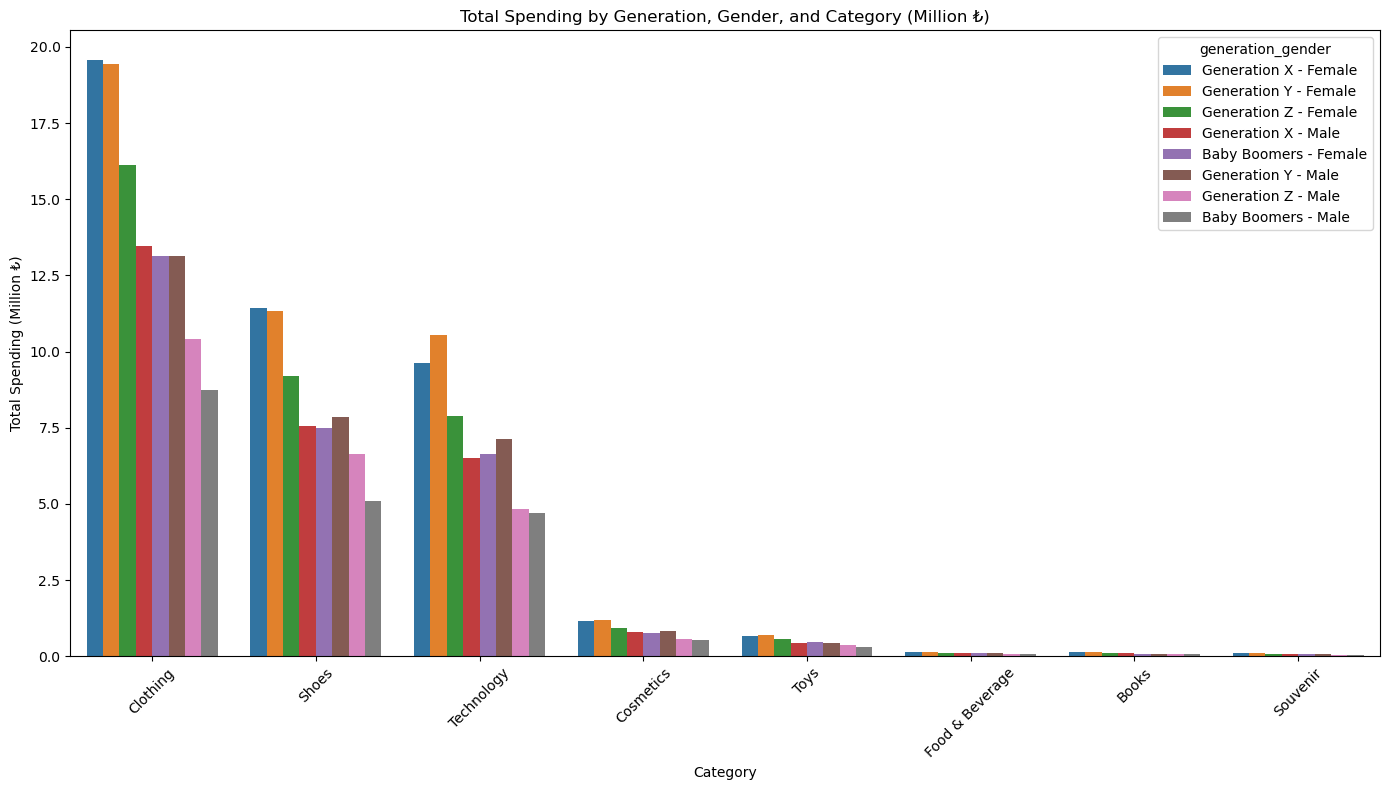

In [43]:
# Group total spending (millions) based on gender, generation, and category
target_category_spending = shopping.groupby(['generation', 'gender', 'category'], observed=False)['total_spending_million'].sum().reset_index()
target_category_spending.sort_values(by='total_spending_million', ascending=False,inplace = True)

# Create a combined column for generation and gender
target_category_spending['generation'] = target_category_spending['generation'].astype(str)
target_category_spending['generation_gender'] = target_category_spending['generation'] + ' - ' + target_category_spending['gender']

# Create a bar plot for total spending (millions) of generations and genders by category
plt.figure(figsize=(14, 8))
sns.barplot(data=target_category_spending, x='category', y='total_spending_million', hue='generation_gender')
plt.title('Total Spending by Generation, Gender, and Category (Million ₺)')
plt.xlabel('Category')
plt.ylabel('Total Spending (Million ₺)')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**From the plots above, we can note that:**
- Clothing is the highest-spending category, followed by shoes and technology. Marketing efforts should focus on these product categories.
- Across all generations, females consistently spend more than males in most categories, particularly in clothing, shoes, and technology. Thus, marketing campaigns should prioritize female consumers.
- While not the top spenders, Generation Z (male and female customers) shows significant spending in clothing and technology. As this generation's purchasing power is growing, targeted campaigns could cultivate long-term customer loyalty.


### 2. Spending Behaviour between Genders

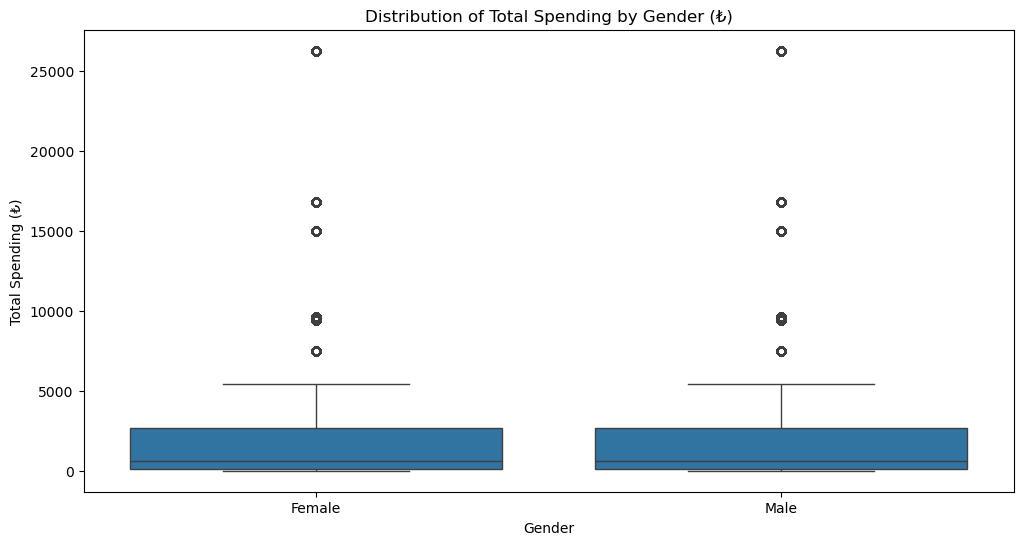

In [44]:
# Create a box plot for total spending between Male and Female
plt.figure(figsize=(12, 6))
sns.boxplot(x='gender', y='total_spending', data=shopping)
plt.title('Distribution of Total Spending by Gender (₺)')
plt.xlabel('Gender')
plt.ylabel('Total Spending (₺)')
plt.show()

**Based on the boxplot, we can infer the following about the spending behavior:**
- Male and female customers exhibit remarkably similar spending distributions, with nearly identical medians, quartiles, and overall ranges. This suggests that there is not a significant difference in spending behavior between genders.
- Both gender categories display several outliers at the upper end of the spending range. These outliers indicate the presence of high-value shoppers across both groups.

### 3. Relationship between Age and Spending

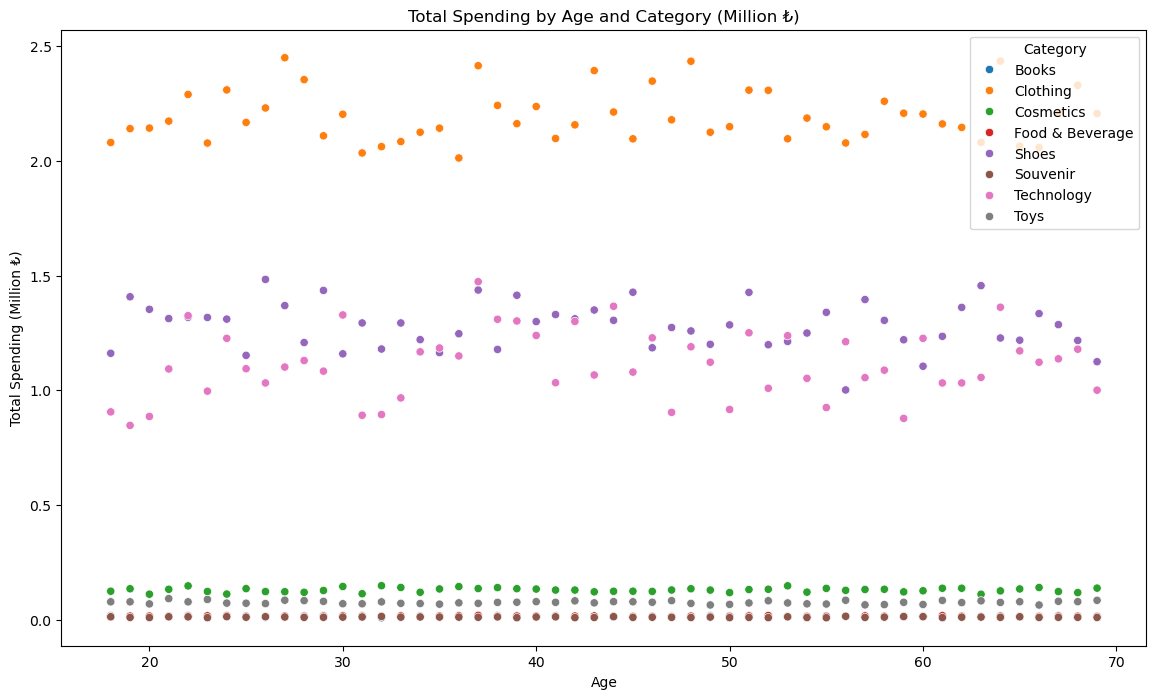

In [45]:
# Calculate total spending (millions) by age and category
age_category_spending = shopping.groupby(['age', 'category'])['total_spending_million'].sum().reset_index()

# Visualize the relationship between age and total spending (millions) for each category
plt.figure(figsize=(14, 8))
sns.scatterplot(data=age_category_spending, x='age', y='total_spending_million', hue='category', marker='o')
plt.title('Total Spending by Age and Category (Million ₺)')
plt.xlabel('Age')
plt.ylabel('Total Spending (Million ₺)')
plt.legend(title='Category')
plt.show()

In [46]:
# Compute the correlation coefficient for each category
grouped_data = age_category_spending.groupby('category')
for category, group in grouped_data:
    correlation_coefficient = group['age'].corr(group['total_spending_million'])
    print(f"Category: {category}, Correlation: {correlation_coefficient:.2f}")

Category: Books, Correlation: -0.15
Category: Clothing, Correlation: 0.03
Category: Cosmetics, Correlation: 0.03
Category: Food & Beverage, Correlation: -0.13
Category: Shoes, Correlation: -0.18
Category: Souvenir, Correlation: -0.15
Category: Technology, Correlation: 0.09
Category: Toys, Correlation: -0.11


**Regarding the relationship between age and spending, we can provide some comments as follows:**
- All categories show weak correlations between age and spending, with values ranging from -0.18 to 0.09. This means that age alone is not a strong predictor of spending in any category.
- Most categories (Books, Food & Beverage, Shoes, Souvenir, and Toys) show slight negative correlations, indicating a weak tendency for spending to decrease with age in these categories.
- Technology has the highest positive correlation (0.09), though still weak. This might indicate a slight trend for older individuals to spend more on technology, possibly due to their higher disposable income.
- In contrast, the strongest negative correlation (-0.18) is observed in the Shoes. This result suggests a minor trend of decreased spending on shoes as age increases.


### 4. Average Spending across Customer Groups

In [47]:
# We have already created the 'generation' column in the previous steps
shopping['generation'].value_counts()

generation
Generation Y    28935
Generation X    28436
Generation Z    23041
Baby Boomers    19042
Name: count, dtype: int64

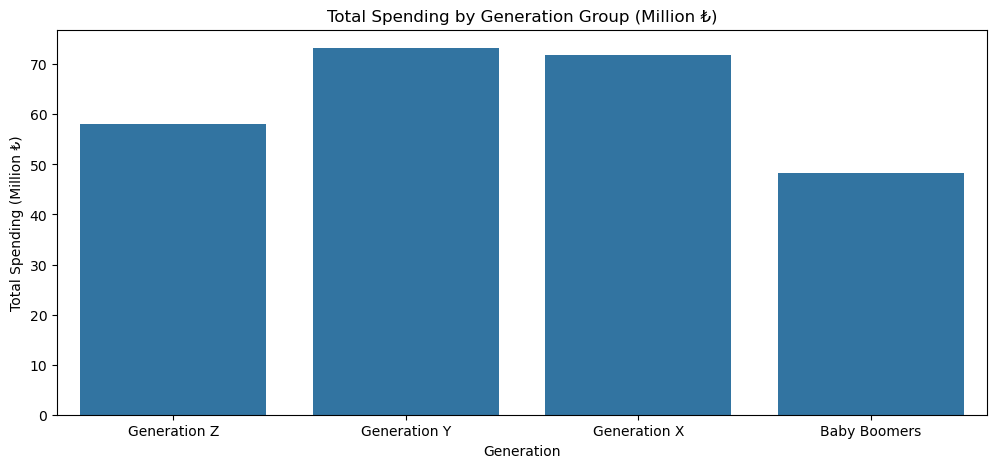

In [48]:
# Compute total spending by generation group
generation_total_spending = shopping.groupby(['generation'],observed=True)['total_spending_million'].sum().reset_index()

# Create a bar plot for total spending by generation group
plt.figure(figsize=(12, 5))

sns.barplot(x='generation', y='total_spending_million', data=generation_total_spending)
plt.title('Total Spending by Generation Group (Million ₺)')
plt.xlabel('Generation')
plt.ylabel('Total Spending (Million ₺)')

plt.show()

**Given the information on total spending by generation group, we can see some particular patterns:**
- Generation Y (ages 30-44) leads in total spending, possibly due to being in their prime earning years and having significant purchasing power.
- Generation X (ages 45-59) is a close second. This is also likely due to established careers and stable income.
- Generation Z (ages 12-29) shows lower spending, which could be attributed to being early in their careers or still in education.
- Baby Boomers (ages 60+) have the lowest total spending among the groups, which might be due to different lifestyle needs or being past peak earning years.

## Section 3: Recommendations

### 3.1 Sales by Payment Method

In [49]:
# Compute total spending by payment method
sales_by_payment_method = shopping.groupby('payment_method')['total_spending_million'].sum().reset_index()
sales_by_payment_method['proportion'] = round((sales_by_payment_method['total_spending_million'] / sales_by_payment_method['total_spending_million'].sum())*100,2)
sales_by_payment_method

,payment_method,total_spending_million,proportion
0,Cash,112.827442,44.86
1,Credit Card,88.077124,35.02
2,Debit Card,50.590976,20.12


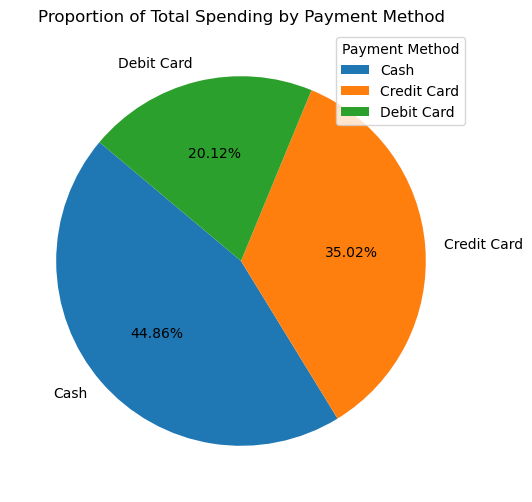

In [50]:
# Create a pie chart of total spending by payment method
plt.figure(figsize=(10, 6))
plt.pie(sales_by_payment_method['total_spending_million'], labels=sales_by_payment_method['payment_method'], autopct='%1.2f%%', startangle=140)
plt.title('Proportion of Total Spending by Payment Method')
plt.legend(title='Payment Method', loc='upper right')
plt.show()

**Based on the pie chart above, we can draw several insights into customer preferences for payment methods:**
- Cash remains the primary method, accounting for 44.86% of total spending. 
- Credit cards follow closely at 35.02%, reflecting their appeal for convenience and potential benefits. Debit cards are used least frequently, accounting for 20.12% of transactions. 
- Notably, combined card payments (credit and debit) marginally surpass cash usage at 55.14%. This slight preference suggests a gradual shift towards electronic payment methods.

**Given these insights, we might recommend the following strategies:**
- Maintain strong cash handling while enhancing electronic payment systems to balance current preferences and future shifts.
- Implement a loyalty program with benefits for all payment methods, offering slightly higher rewards for card transactions to encourage electronic payments without discouraging cash users.

### 3.2 Sales Trend Over Time:


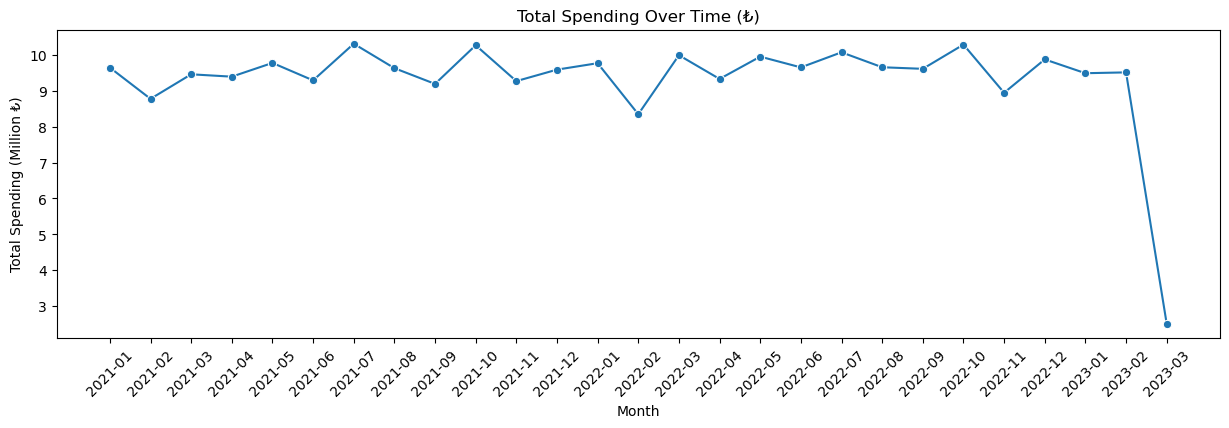

In [51]:
# Calculate the total spending (millions) by month and year
sales_over_time = shopping.groupby(['month_year'])['total_spending_million'].sum().reset_index()

# Create a line plot for total spending over time (monthly)
plt.figure(figsize=(15, 4))
sns.lineplot(x='month_year', y='total_spending_million', data=sales_over_time, marker='o')
plt.title('Total Spending Over Time (₺)')
plt.xlabel('Month')
plt.ylabel('Total Spending (Million ₺)')
plt.xticks(rotation=45)
plt.show()

**Comment on sales trend over time:**
- The total monthly sales shows fluctuations over time, with no clear linear trend upward or downward until the last data point.
- Most of the data points fall between 9 and 10 million ₺, indicating relatively stable sale patterns.
- There are noticeable peaks in spending, particularly around July and October of each year, while February is a period experiencing the lowest sales.
- A significant anomaly is observed in March 2023, where spending drops dramatically to about 2.5 million, sharply contrasting with previous months' patterns.


**Given these insights, we could make the following recommendations:**
- Leverage high-performing months (July and October) with targeted marketing and extended hours. Develop special events and promotions to boost sales during slower months like February.
- The dramatic drop in March 2023 needs immediate attention and analysis to understand its cause and potential long-term implications.

## Reference
University of Southern California Libraries. (n.d.). Research guides: Demographics: Age groups. USC Libraries. https://libguides.usc.edu/busdem/age